The most probable parameters based on the Bayesian framework are m1 = 0.2402, m2 = -1.6026
With these parameters, the function value (or energy) is -6.5432


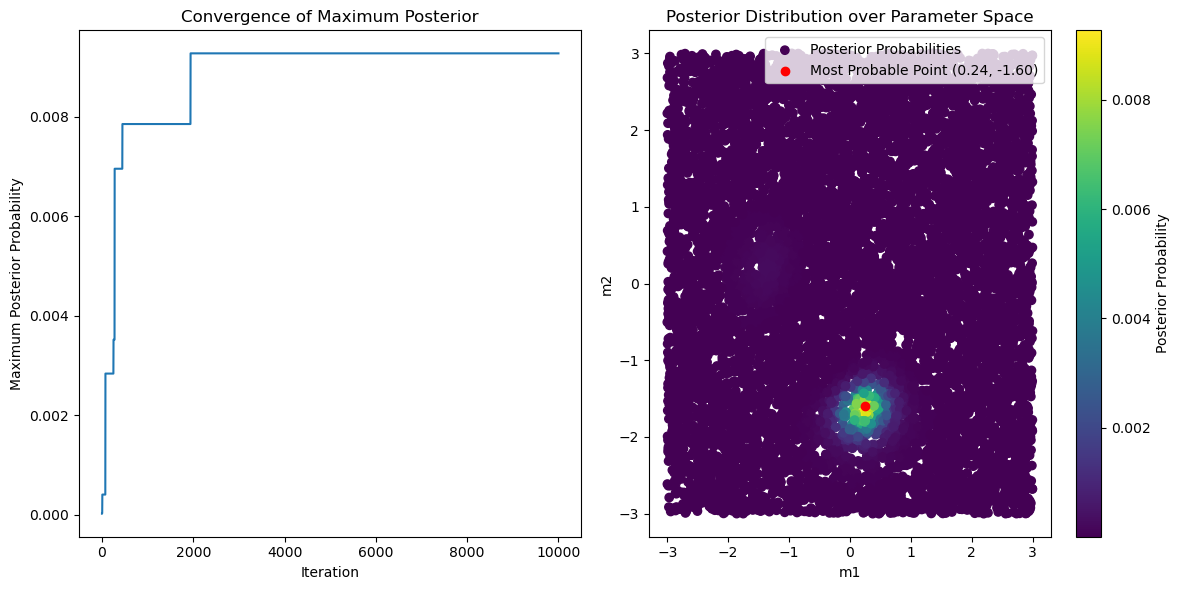

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to optimize
def fun(m1, m2):
    return (3 * (1 - m1)**2 * np.exp(-(m1**2) - (m2 + 1)**2) -
            10 * (m1 / 5 - m1**3 - m2**5) * np.exp(-m1**2 - m2**2) -
            1/3 * np.exp(-(m1 + 1)**2 - m2**2))

# Define the likelihood function as the negative of the function to minimize
def likelihood(m1, m2):
    return np.exp(-fun(m1, m2))  # Exponential of negative to simulate likelihood from energy function

# Number of Monte Carlo samples
N_samples = 10000

# Prior bounds and uniform prior assumption
m1_bounds = (-3, 3)
m2_bounds = (-3, 3)

# Sampling uniformly from the prior distribution
samples_m1 = np.random.uniform(m1_bounds[0], m1_bounds[1], N_samples)
samples_m2 = np.random.uniform(m2_bounds[0], m2_bounds[1], N_samples)

# Computing likelihoods
likelihoods = np.array([likelihood(m1, m2) for m1, m2 in zip(samples_m1, samples_m2)])

# Unnormalized posterior is proportional to the likelihood times the prior
# Here, prior is uniform and does not change the proportionality
unnormalized_posterior = likelihoods

# Compute normalization constant (marginal likelihood)
marginal_likelihood = np.mean(unnormalized_posterior)

# Normalized posterior probabilities
posterior_probabilities = unnormalized_posterior / np.sum(unnormalized_posterior)

# Identify the maximum posterior sample
max_post_index = np.argmax(posterior_probabilities)
max_post_m1 = samples_m1[max_post_index]
max_post_m2 = samples_m2[max_post_index]
max_post_value = fun(max_post_m1, max_post_m2)

# Print the results
print(f"The most probable parameters based on the Bayesian framework are m1 = {max_post_m1:.4f}, m2 = {max_post_m2:.4f}")
print(f"With these parameters, the function value (or energy) is {max_post_value:.4f}")

# Plot the convergence of the most probable point
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.maximum.accumulate(posterior_probabilities))
plt.title('Convergence of Maximum Posterior')
plt.xlabel('Iteration')
plt.ylabel('Maximum Posterior Probability')

# Plot the posterior distribution across the sampled parameter space
plt.subplot(1, 2, 2)
plt.scatter(samples_m1, samples_m2, c=posterior_probabilities, cmap='viridis', label='Posterior Probabilities')
plt.colorbar(label='Posterior Probability')
plt.scatter(max_post_m1, max_post_m2, color='red', marker='o', label=f'Most Probable Point ({max_post_m1:.2f}, {max_post_m2:.2f})')
plt.title('Posterior Distribution over Parameter Space')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.tight_layout()
plt.show()
